In [1]:
import requests 
from bs4 import BeautifulSoup 
#import csv 


import datetime
import pandas as pd
import numpy as np

In [2]:
data = []

In [3]:
#data.columns = ['Year','Month','Day','Headlines']

In [4]:
#date = datetime.datetime(2019,12,31)
date = datetime.datetime(2020,9,9)
#const = 40178
#const = 43830
const = 44083
for i in range(74) :  
  date = date + datetime.timedelta(days=1)
  const = const+1
  year = date.year
  month = date.month
  day = date.day
  url = "https://timesofindia.indiatimes.com/"+str(date.year)+"/"+str(date.month)+"/"+str(date.day)+"/archivelist/year-"+str(date.year)+",month-"+str(date.month)+",starttime-"+str(const)+".cms"
  
  r = requests.get(url) 
   
  soup = BeautifulSoup(r.content, 'html5lib')

  links = soup.find_all("span",{'style' : "font-family:arial ;font-size:12;color: #006699"})

  soup1 = links[0]
  soup2 = links[1]

  for a in soup1.find_all('a') :
    row = [year, month, day, a.get_text()]
    data.append(row)
  for a in soup2.find_all('a') :
    row = [year, month, day, a.get_text()]
    data.append(row)

  if (i%100 == 0) :
    print(f"---- {i} ----")

---- 0 ----


In [5]:
# #URL = "https://timesofindia.indiatimes.com/2020/1/31/archivelist/year-2020,month-1,starttime-43861.cms"
# r = requests.get(url) 
   
# soup = BeautifulSoup(r.content, 'html5lib')

In [6]:
# links = soup.find_all("span",{'style' : "font-family:arial ;font-size:12;color: #006699"})
#style="font-family:arial ;font-size:12;color: #006699"

In [7]:
# soup1 = links[0]
# soup2 = links[1]

In [8]:
# dataset = pd.DataFrame()
# dataset.columns 

In [9]:
# i = 0
# for a in soup2.find_all('a') :
#   row = [year, month, day, a.get_text()]
#   data.append(row)
#   i = i+1

In [10]:
data1 = np.array(data)

In [11]:
data1.shape

(36859, 4)

In [12]:
dataset = pd.DataFrame(data1)

In [13]:
dataset.columns = ['year','month','day','headlines']

In [14]:
dataset

,year,month,day,headlines
0,2020,9,10,Samantha Akkineni just turned designer and we ...
1,2020,9,10,#KolkataBraveheart: Was a victim of domestic v...
2,2020,9,10,Prabhu Mundkur dons an intense look in Pradeep...
3,2020,9,10,Salman Khan shares a picture himself enjoying ...
4,2020,9,10,CM Yediyurappa to help Sandalwood find its foo...
...,...,...,...,...
36854,2020,11,22,Blackmail probe reveals rape horror of Rajkot ...
36855,2020,11,22,Doctors link obesity with higher risk of death...
36856,2020,11,22,Theft accused flees Covid ward of Bharuch civi...
36857,2020,11,22,Shops violating Covid norms land in trouble


In [15]:
dataset.to_csv('2020_headlines_9_9.csv')

In [16]:
dataset['contains_covid'] = dataset.headlines.apply(lambda x: 1 if (('covid' in x.lower()) or ('corona' in x.lower())) else 0)

In [17]:
dataset[dataset['contains_covid']==1]

,year,month,day,headlines,contains_covid
77,2020,9,10,SMS-based Covid test report mechanism hits tec...,1
79,2020,9,10,Health dept issues SoPs for exams to check Cov...,1
87,2020,9,10,"Event management companies go virtual, conduct...",1
91,2020,9,10,"Covid-19, infections take toll on mental health",1
98,2020,9,10,"Even WHO, ICMR faltered on Covid: Telangana CM",1
...,...,...,...,...,...
36848,2020,11,22,"Daily Covid cases just under 6,000 in Delhi, b...",1
36853,2020,11,22,Covid-19: Highest number of tests in a day in ...,1
36855,2020,11,22,Doctors link obesity with higher risk of death...,1
36856,2020,11,22,Theft accused flees Covid ward of Bharuch civi...,1


In [18]:
df = dataset.groupby(['year','month','day'])['contains_covid'].sum().reset_index()

In [19]:
df['date'] = pd.to_datetime(dataset[["year", "month", "day"]])

In [20]:
df

,year,month,day,contains_covid,date
0,2020,10,1,48,2020-09-10
1,2020,10,10,42,2020-09-10
2,2020,10,11,47,2020-09-10
3,2020,10,12,53,2020-09-10
4,2020,10,13,49,2020-09-10
...,...,...,...,...,...
69,2020,9,26,54,2020-09-10
70,2020,9,27,56,2020-09-10
71,2020,9,28,70,2020-09-10
72,2020,9,29,60,2020-09-10


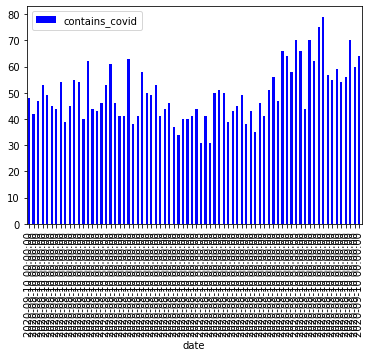

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

df.plot.bar(x="date", y="contains_covid", color='blue');

In [22]:
df.to_csv('datewise_covid_mention_sep.csv')